# Baseball Case Study

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, power_transform, LabelEncoder

In [2]:
df = pd.read_csv('Baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [4]:
df.shape

(30, 17)

In [5]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Checking null values

In [6]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There are no null values

<AxesSubplot:>

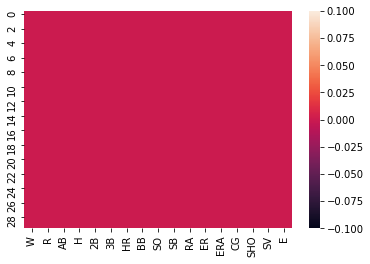

In [7]:
sns.heatmap(df.isnull())

# EDA

<AxesSubplot:xlabel='R', ylabel='W'>

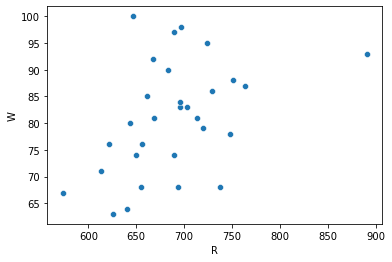

In [9]:
sns.scatterplot(x = 'R',y='W',data = df)

There is some minor relation between R and W

<AxesSubplot:xlabel='AB', ylabel='W'>

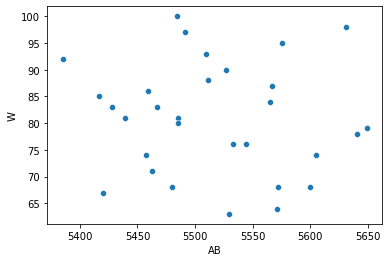

In [10]:
sns.scatterplot(x = 'AB',y='W',data = df)

There is no relation between AB and W

<AxesSubplot:xlabel='H', ylabel='W'>

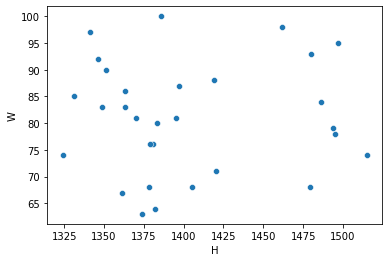

In [12]:
sns.scatterplot(x = 'H',y='W',data = df)

There is no relation between H and W

<AxesSubplot:xlabel='2B', ylabel='W'>

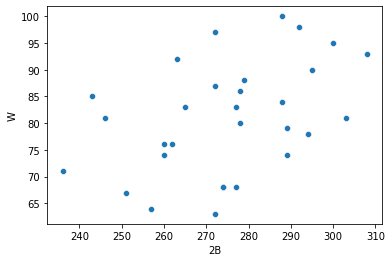

In [14]:
sns.scatterplot(x = '2B',y='W',data = df)

There is some positive relation between 2B and W

<AxesSubplot:xlabel='3B', ylabel='W'>

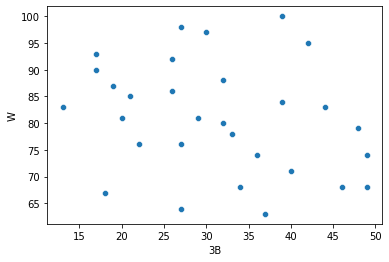

In [16]:
sns.scatterplot(x = '3B',y='W',data = df)

There is no relation between 3B and W

<AxesSubplot:xlabel='HR', ylabel='W'>

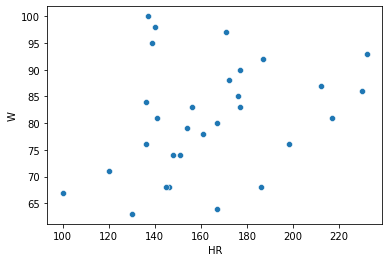

In [18]:
sns.scatterplot(x = 'HR',y='W',data = df)

There is some positive relation between HR and W

<AxesSubplot:xlabel='BB', ylabel='W'>

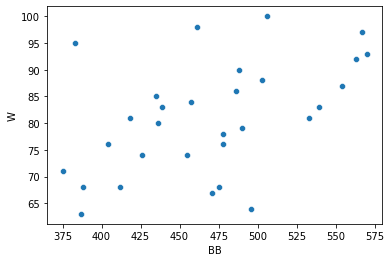

In [19]:
sns.scatterplot(x = 'BB',y='W',data = df)

There is some positive relation between BB and W

<AxesSubplot:xlabel='SO', ylabel='W'>

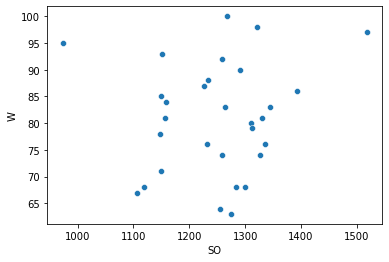

In [20]:
sns.scatterplot(x = 'SO',y='W',data = df)

There is no relation between SO and W

<AxesSubplot:xlabel='SB', ylabel='W'>

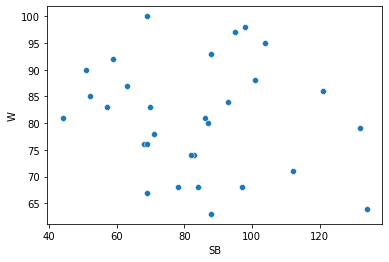

In [21]:
sns.scatterplot(x = 'SB',y='W',data = df)

There is no relation between SB and W

<AxesSubplot:xlabel='RA', ylabel='W'>

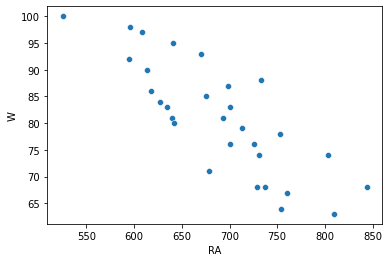

In [22]:
sns.scatterplot(x = 'RA',y='W',data = df)

There is a strong relation between RA and W

<AxesSubplot:xlabel='ER', ylabel='W'>

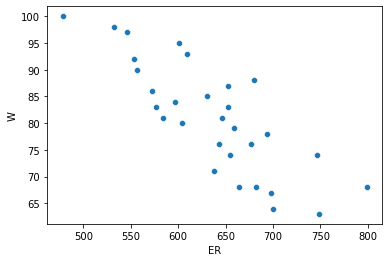

In [23]:
sns.scatterplot(x = 'ER',y='W',data = df)

There is a strong negative relation between ER and W

<AxesSubplot:xlabel='ERA', ylabel='W'>

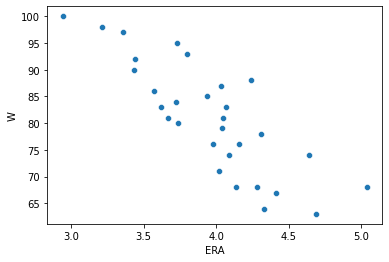

In [26]:
sns.scatterplot(x = 'ERA',y='W',data = df)

There is a strong negative relation between ERA and W

<AxesSubplot:xlabel='CG', ylabel='W'>

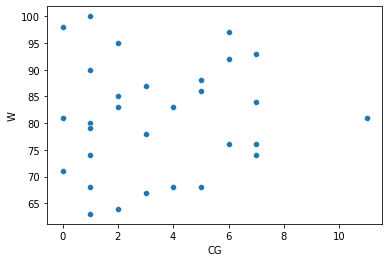

In [29]:
sns.scatterplot(x = 'CG',y='W',data = df)

There is no relation between CG and W

<AxesSubplot:xlabel='SHO', ylabel='W'>

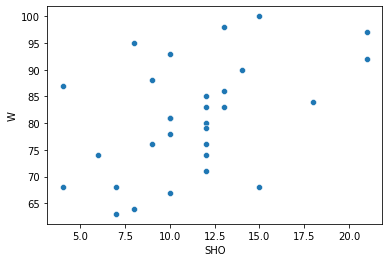

In [30]:
sns.scatterplot(x = 'SHO',y='W',data = df)

There is no relation between SHO and W

<AxesSubplot:xlabel='SV', ylabel='W'>

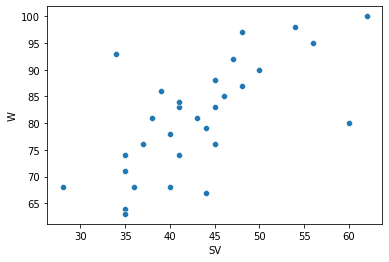

In [33]:
sns.scatterplot(x = 'SV',y='W',data = df)

There is positive relation between SV and W

<AxesSubplot:xlabel='E', ylabel='W'>

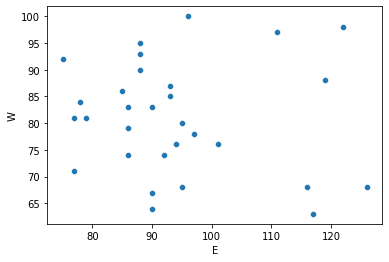

In [34]:
sns.scatterplot(x = 'E',y='W',data = df)

There is no relation between E and W

# Checking the data distribution

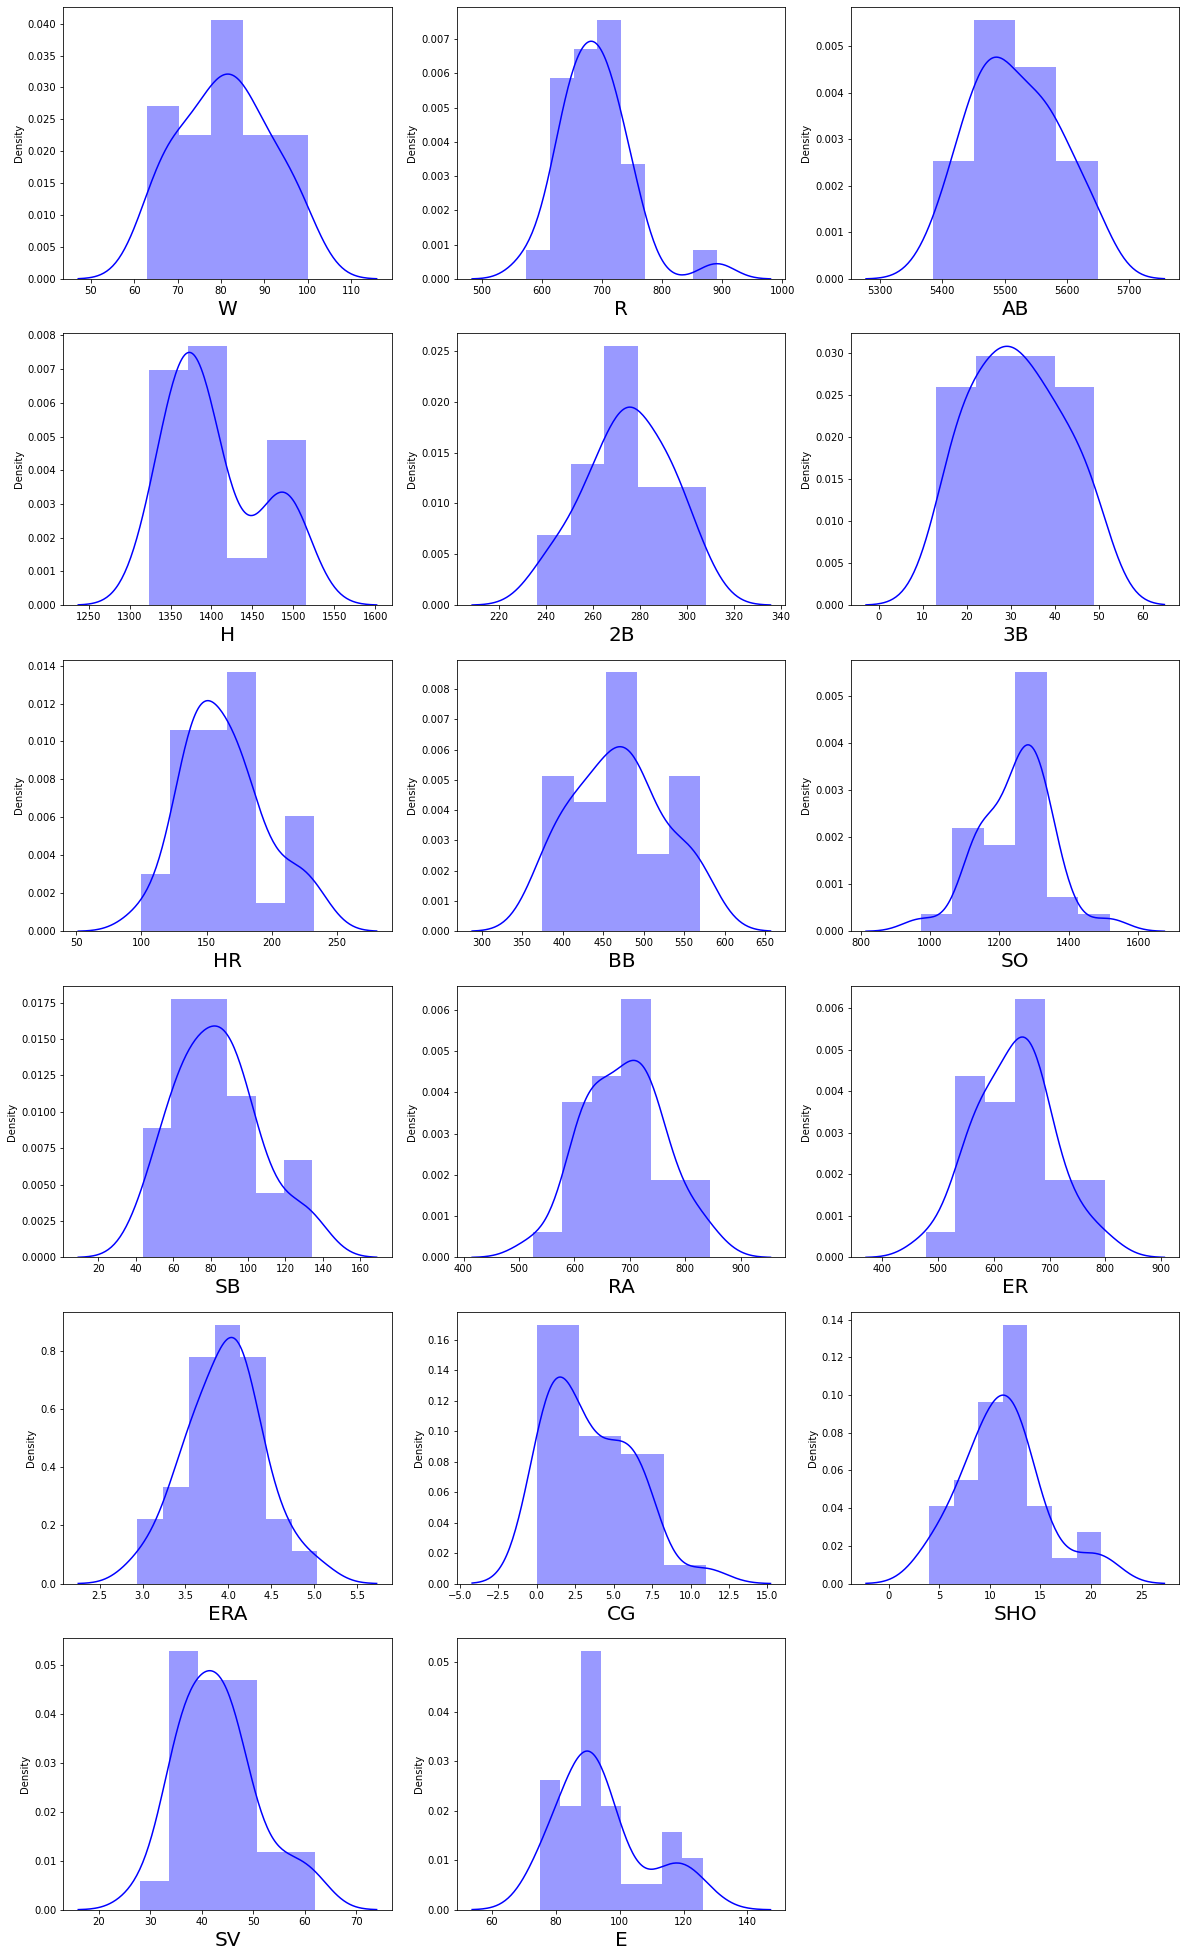

In [38]:
plt.figure(figsize = (20,35))
pltnum = 1
for i in df:
    if pltnum <=18:
        plt.subplot(6,3,pltnum)
        sns.distplot(df[i], color = 'blue')
        plt.xlabel(i,fontsize = 20)
    pltnum+=1
plt.show()

# Correlation

In [39]:
corr_data = df.corr()
corr_data['W'].sort_values(ascending = False)

W      1.000000
SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
Name: W, dtype: float64

SV has the highest positive correlation and ERA has the highest negative correlation

checking multi-colinearity

<AxesSubplot:>

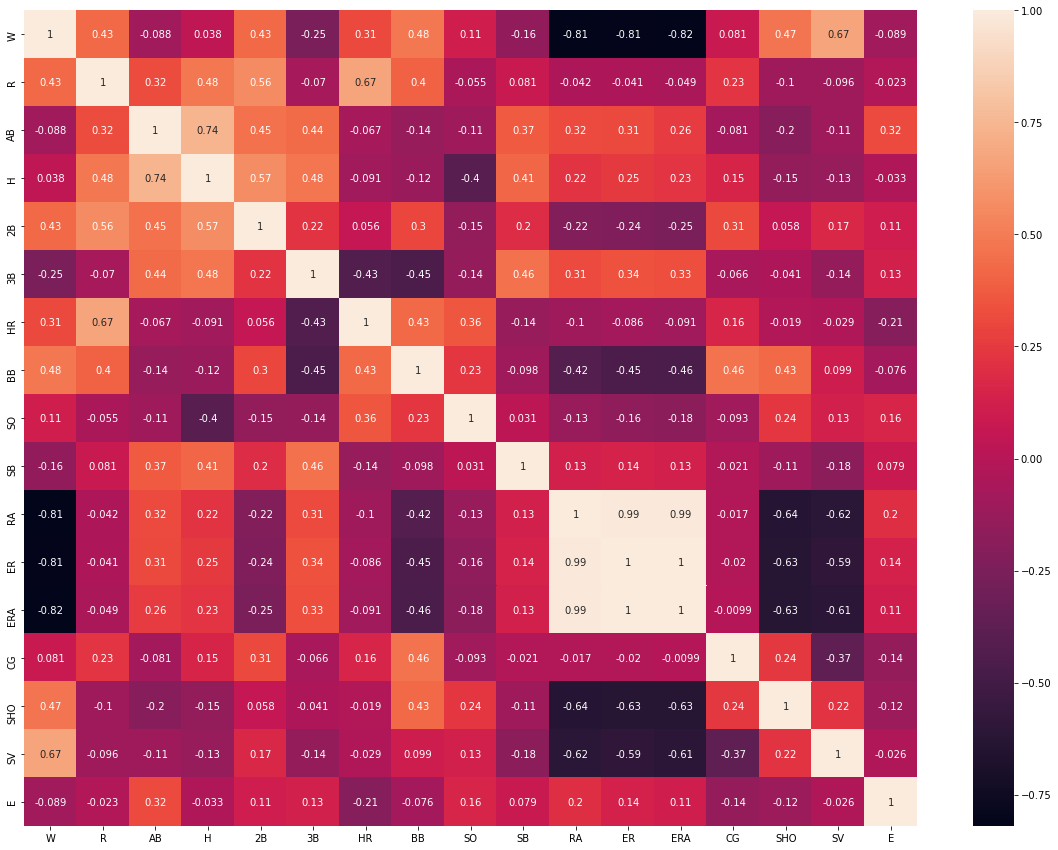

In [40]:
plt.figure(figsize = (20,15))
sns.heatmap(corr_data,annot = True)

RA,ER & ERA has the highest correlation

# Checking the outliers

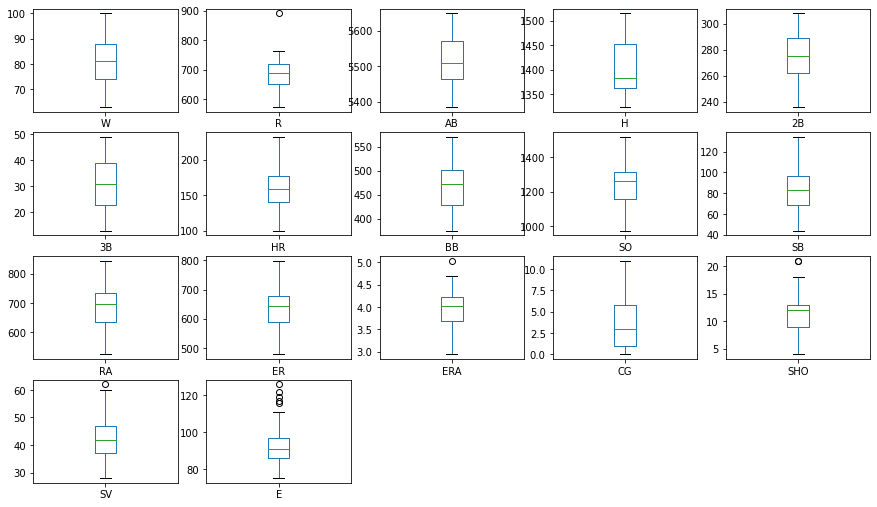

In [59]:
df.plot(kind='box', subplots=True, layout=(5,5), sharex=False, legend=False, figsize=(15,11))
plt.show()

E has most number of outliers compared to SHO,ERA,SV,R

In [60]:
z = np.abs(zscore(df[['E']]))
z

array([[0.46146963],
       [0.60719689],
       [1.11724227],
       [0.48575751],
       [0.60719689],
       [0.46146963],
       [0.0971515 ],
       [1.26296953],
       [0.04857575],
       [0.194303  ],
       [1.79730279],
       [0.68006051],
       [0.0971515 ],
       [0.02428788],
       [2.30734817],
       [0.12143938],
       [2.01589367],
       [1.21439378],
       [1.57871191],
       [0.31574238],
       [0.46146963],
       [0.31574238],
       [1.26296953],
       [0.31574238],
       [1.65157553],
       [1.40869678],
       [1.1901059 ],
       [0.60719689],
       [0.17001513],
       [0.04857575]])

# Z-score

In [61]:
ds_new = df[(z<2).all(axis = 1)]
print(df.shape)
print(ds_new.shape)

(30, 17)
(28, 17)


The data loss is less than 10% so we can proceed

now checking the skewness

In [62]:
ds_new.skew()

W     -0.004958
R      1.194037
AB     0.294350
H      0.766815
2B    -0.145911
3B     0.147206
HR     0.400626
BB     0.149733
SO    -0.167915
SB     0.512281
RA     0.043121
ER     0.068979
ERA    0.098834
CG     0.781977
SHO    0.698213
SV     1.029483
E      0.893043
dtype: float64

R,H,SB,CG,SHO,SV,E has skewness

Spliting the data

In [63]:
x = ds_new.drop(columns = 'W')
y = ds_new['W']

In [64]:
tr_data = np.cbrt(x)
x = pd.DataFrame(tr_data, columns = x.columns)

In [65]:
x.skew()

R      0.902246
AB     0.277338
H      0.740474
2B    -0.242048
3B    -0.226837
HR     0.056582
BB     0.022089
SO    -0.445698
SB     0.097321
RA    -0.158971
ER    -0.170051
ERA   -0.166560
CG    -1.016332
SHO   -0.161847
SV     0.772167
E      0.695383
dtype: float64

In [66]:
scale = StandardScaler()
scaled = scale.fit_transform(x)

the skewness is reduced but there are still some skewness which can later be handled by regularization technique.

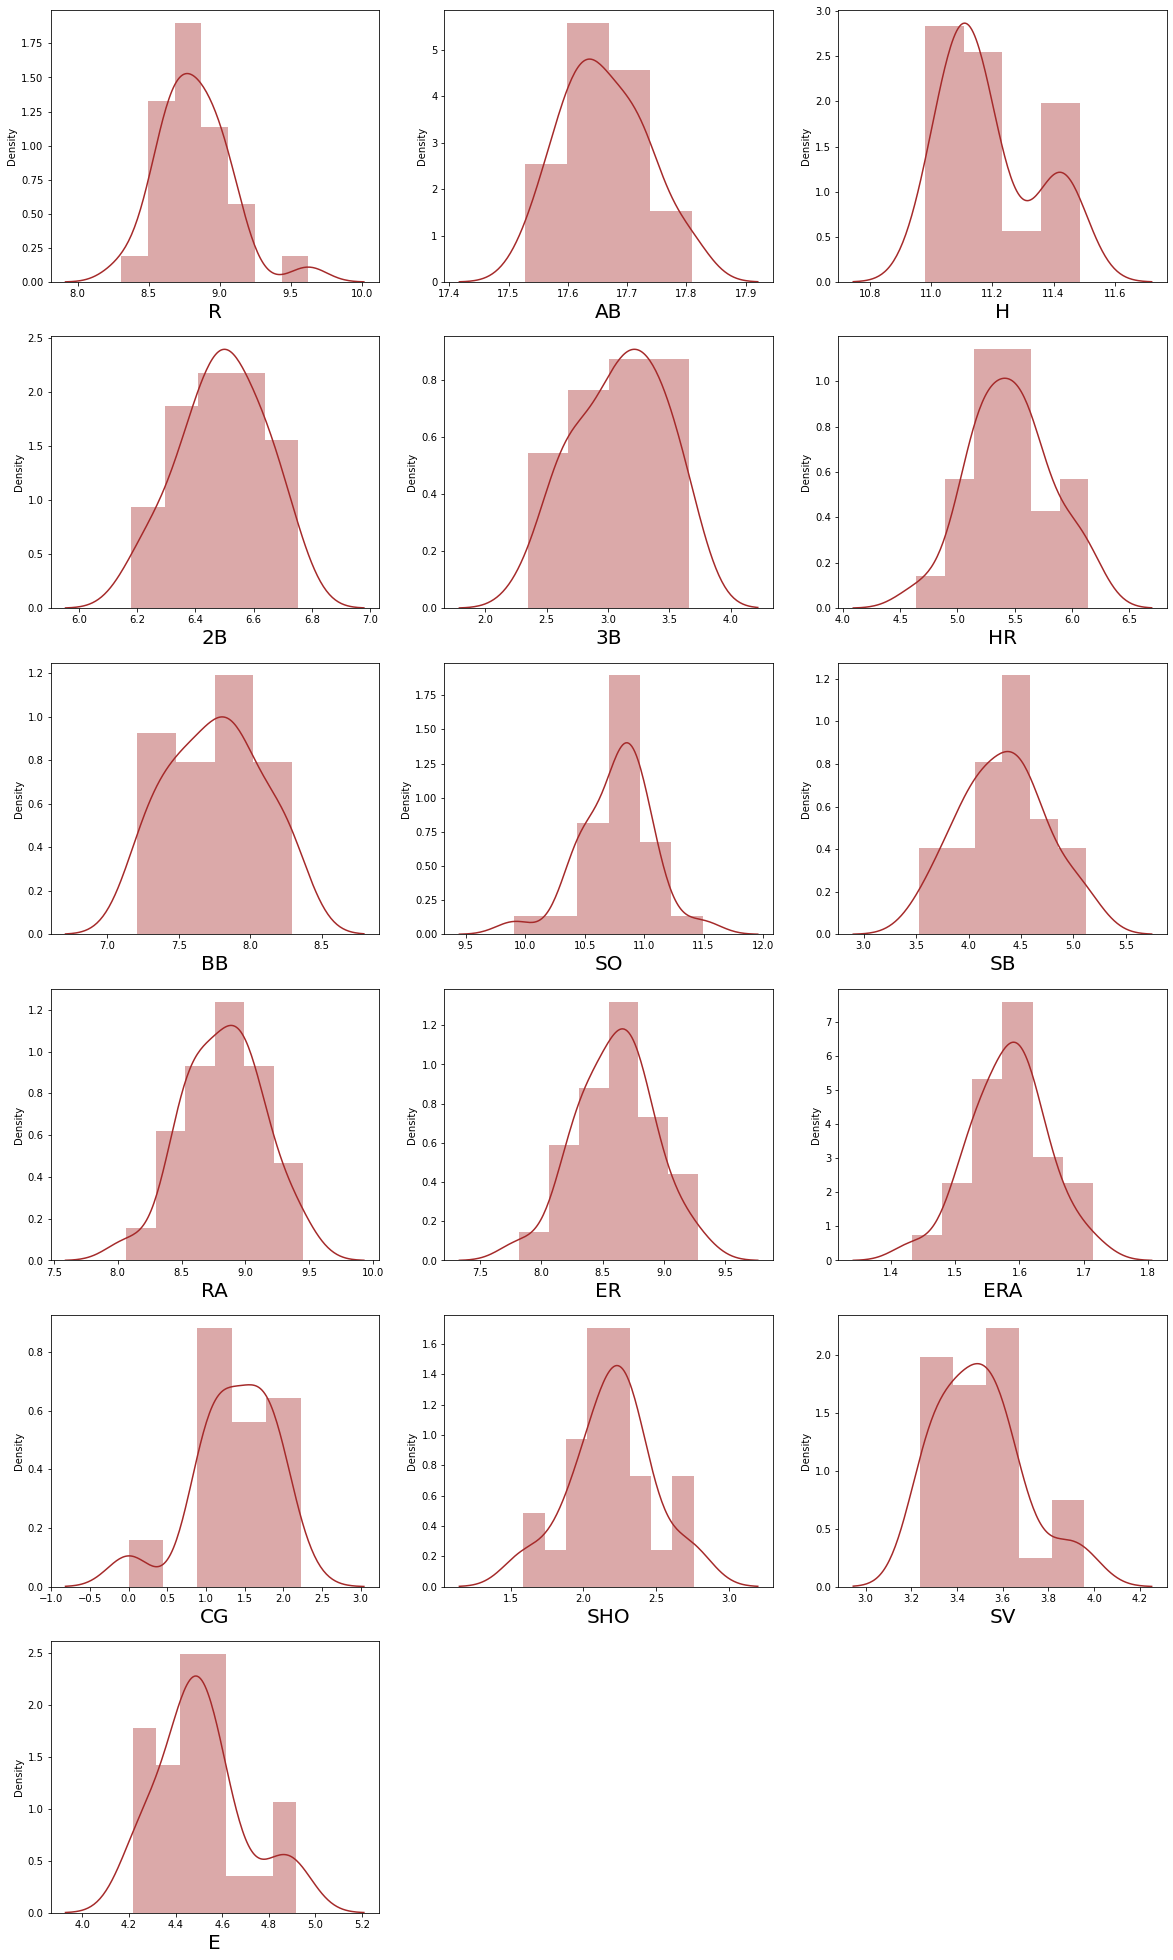

In [67]:
plt.figure(figsize = (20,35))
pltnum = 1
for i in x:
    if pltnum <=18:
        plt.subplot(6,3,pltnum)
        sns.distplot(x[i], color = 'brown')
        plt.xlabel(i,fontsize = 20)
    pltnum+=1
plt.show()

the score is not improved so removing ERA

In [ ]:
x = x.drop(columns = ['ERA'])

now checking the multicollinearity again

<AxesSubplot:>

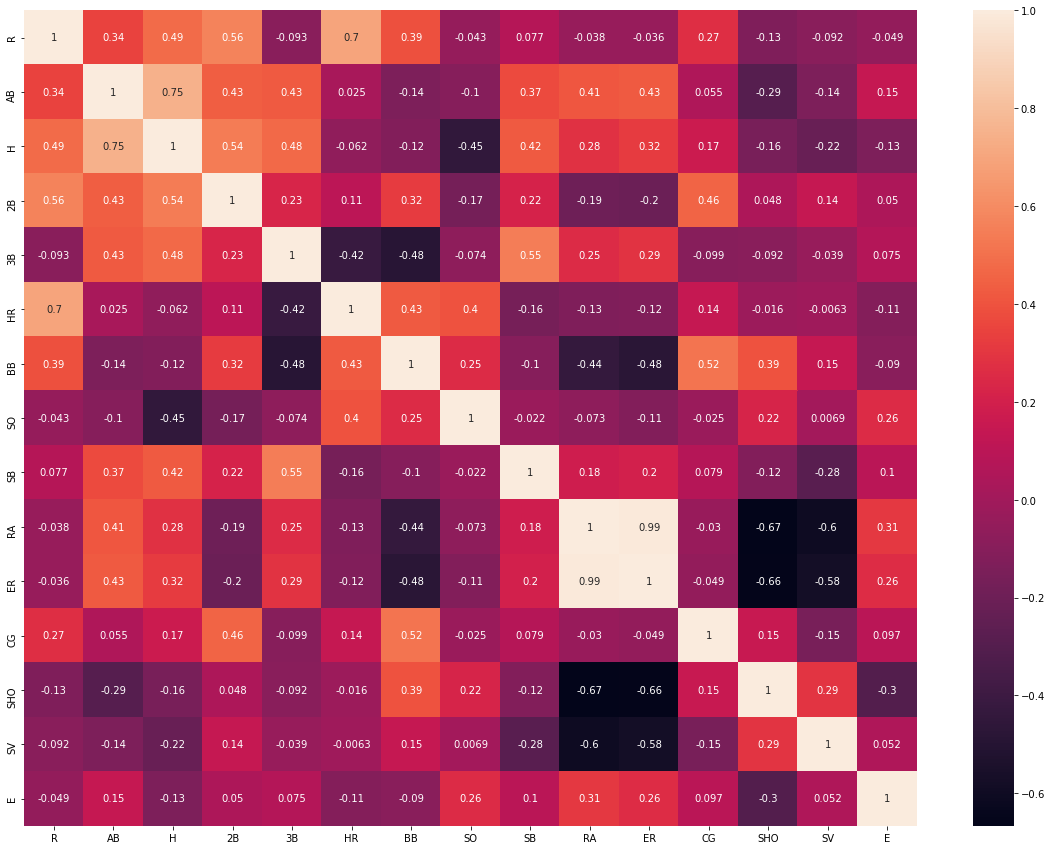

In [70]:
cor  = x.corr()
plt.figure(figsize= (20,15))
sns.heatmap(cor,annot = True)

It has a few out liers but it is following normal distribution

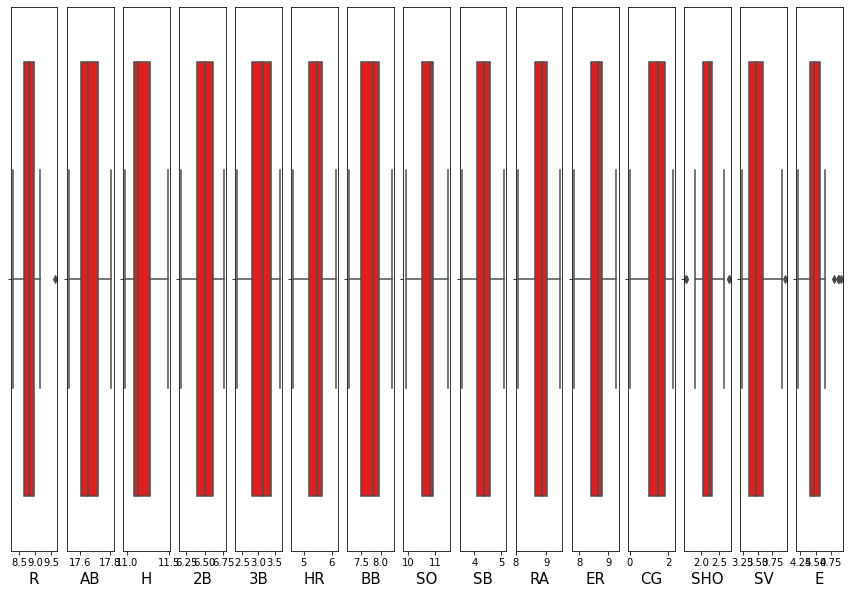

In [71]:
plt.figure(figsize = (30,70))
pltnum = 1
for i in x:
    if pltnum <=180:
        plt.subplot(6,30,pltnum)
        sns.boxplot(x[i], color = 'red', orient = 'v')
        plt.xlabel(i,fontsize = 15)
    pltnum+=1
plt.show()

# Model

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
for i in range(0,3000):
    x_train,x_test,y_train,y_test =  train_test_split(x,y,random_state = i)
    linr = LinearRegression()
    linr.fit(x_train,y_train)
    trn_pred = linr.predict(x_train)
    tst_pred = linr.predict(x_test)
    trn_score = linr.score(x_train,y_train)
    tst_score = linr.score(x_test,y_test)
    if round(trn_score,1)== round(tst_score,1):
        brs = i
print('The best random state is', i)

The best random state is 2999


Model 1

In [73]:
x_train,x_test, y_train,y_test = train_test_split(x,y, random_state = 2999)
lin = LinearRegression()
lin.fit(x_train,y_train)
lin_pred = lin.predict(x_test)
lin_score = lin.score(x_test,y_test)
lin_score

0.4285871736654705

In [74]:
lin_rmse = np.sqrt(mean_squared_error(y_test,lin_pred))
print('RMSE for Linear Regression: ', lin_rmse)

RMSE for Linear Regression:  7.221507219252406


Model 2

In [75]:
from sklearn.ensemble import RandomForestRegressor
rfr =  RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_pred = rfr.predict(x_test)
rfr_score = rfr.score(x_test,y_test)
rfr_score

0.6094926654740607

In [76]:
rfr_rmse = np.sqrt(mean_squared_error(y_test,rfr_pred))
print('RMSE for Random Forest Regression: ', rfr_rmse)

RMSE for Random Forest Regression:  5.969905479031595


Model 3

In [78]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)
ada_pred = ada.predict(x_test)
ada_score = ada.score(x_test,y_test)
ada_score

0.6674329898431378

In [79]:
ada_rmse = np.sqrt(mean_squared_error(y_test,ada_pred))
print('RMSE for AdaBoost Regression: ', ada_rmse)

RMSE for AdaBoost Regression:  5.509249494095691


Model 4

In [80]:
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor()
et.fit(x_train,y_train)
et_pred = et.predict(x_test)
et_score = et.score(x_test,y_test)
et_score

0.5930605098389986

In [81]:
et_rmse = np.sqrt(mean_squared_error(y_test,et_pred))
print('RMSE for Extra trees Regression: ', et_rmse)

RMSE for Extra trees Regression:  6.0942150555142955


Model 5

In [82]:
from sklearn.linear_model import Ridge, RidgeCV
ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01), normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [83]:
alpha = ridgecv.alpha_
ridge = Ridge(alpha)
ridge.fit(x_train,y_train)

Ridge(alpha=0.09099999999999998)

In [84]:
rid_pred = ridge.predict(x_test)
rid_score = ridge.score(x_test,y_test)
rid_score

0.8261289809348923

In [85]:
rid_rmse = np.sqrt(mean_squared_error(y_test,rid_pred))
print('RMSE for Ridge Regression: ', rid_rmse)

RMSE for Ridge Regression:  3.9835150032100066


Using cross validation

In [86]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(lin,x,y,scoring ='r2',cv=7)
cv = cv.mean()
cv

0.5519045566260968

In [87]:
cv1 = cross_val_score(rfr,x,y,scoring ='r2',cv=7)
cv1 = cv1.mean()
cv1

-0.15912954110037095

In [88]:
cv2 = cross_val_score(ada,x,y,scoring ='r2',cv=7)
cv2 = cv2.mean()
cv2

-0.4885805048963855

In [89]:
cv3 = cross_val_score(et,x,y,scoring ='r2',cv=7)
cv3 = cv3.mean()
cv3

-0.4051475721574361

In [90]:
cv4 = cross_val_score(ridge,x,y,scoring ='r2',cv=7)
cv4 = cv4.mean()
cv4

0.6390770393580303

The best model

In [91]:
mod = [lin_score,rfr_score,ada_score,et_score,rid_score]
cv =  [cv,cv1,cv2,cv3,cv4]
model = pd.DataFrame({})
model['mod'] = mod
model['cv'] = cv
model['Diff'] = model['mod'] - model['cv']
model

,mod,cv,Diff
0,0.428587,0.551905,-0.123317
1,0.609493,-0.159130,0.768622
2,0.667433,-0.488581,1.156013
3,0.593061,-0.405148,0.998208
4,0.826129,0.639077,0.187052


Ridge regression is the best model

# Hyper Parameter Tuning on Ridge Regression

In [92]:
params = {'alpha':np.arange(0.001,1,0.001),
         'normalize':[True,False],
         'max_iter':[200,400,600,800,1000],
         'fit_intercept':[True,False]}

In [93]:
gcv = GridSearchCV(Ridge(),params,cv=7)
gcv.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=Ridge(),
             param_grid={'alpha': array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.0...
       0.955, 0.956, 0.957, 0.958, 0.959, 0.96 , 0.961, 0.962, 0.963,
       0.964, 0.965, 0.966, 0.967, 0.968, 0.969, 0.97 , 0.971, 0.972,
       0.973, 0.974, 0.975, 0.976, 0.977, 0.978, 0.979, 0.98 , 0.981,
       0.982, 0.983, 0.984, 0.985, 0.986, 0.987, 0.988, 0.989, 0.99 ,
       0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.998, 0.999]),
                         'fit_intercept': [True, False],
                         'max_iter': [200, 400, 600, 800, 1000],
                         'normalize': [True, False]})

In [94]:
gcv.best_params_

{'alpha': 0.999, 'fit_intercept': False, 'max_iter': 200, 'normalize': True}

In [95]:
rid = Ridge(alpha = 0.9991, fit_intercept = False, max_iter =200, normalize = True)
rid.fit(x_train,y_train)
fin_score = rid.score(x_test,y_test)
fin_pred = rid.predict(x_test)
print(fin_score)

0.7076992035798009


In [96]:
fin_rmse = np.sqrt(mean_squared_error(y_test,fin_pred))
print('RMSE for Ridge Regression: ', fin_rmse)


RMSE for Ridge Regression:  5.164970635456228


Saving the model

In [97]:
import joblib
joblib.dump(ridge,'baseball.pkl')

['baseball.pkl']